## Assignment Python 1

Tugas ini bertujuan untuk membuat visualisasi data dengan python dengan menggunakan dataset tentang Kejahatan London 
yang dapat diakses melalui https://www.kaggle.com/datasets/jboysen/london-crime .Dataset ini berisi catatan kejahatan 
di wilayah metropolitan utama seperti London dan mencakup jumlah laporan kriminal berdasarkan bulan,wilayah LSOA,serta 
kategori mayor/minor dari bulan januari 2008 sampai desember 2016.

### Import Library

In [62]:
import numpy as np
import pandas as pd

#### Question : Berapa jumlah kejadian dari setiap jenis kejahatan dari tahun 2008-2016?
    

In [76]:
#Mendapatkan Dataset
df_london = pd.read_csv('london_crime_by_lsoa.csv')
print('Data Loading')

Data Loading


In [43]:
df_london.tail() #Menampilkan data dari 5 terbawah 

,lsoa_code,borough,minor_category,value,year,month
major_category,,,,,,
Criminal Damage,E01000504,Brent,Criminal Damage To Dwelling,0,2015,2
Robbery,E01002504,Hillingdon,Personal Property,1,2015,6
Burglary,E01004165,Sutton,Burglary in a Dwelling,0,2011,2
Robbery,E01001134,Croydon,Business Property,0,2011,5
Violence Against the Person,E01003413,Merton,Wounding/GBH,0,2015,6


In [5]:
df_london.set_index('major_category',inplace=True)

In [6]:
df_london

,lsoa_code,borough,minor_category,value,year,month
major_category,,,,,,
Burglary,E01001116,Croydon,Burglary in Other Buildings,0,2016,11
Violence Against the Person,E01001646,Greenwich,Other violence,0,2016,11
Violence Against the Person,E01000677,Bromley,Other violence,0,2015,5
Burglary,E01003774,Redbridge,Burglary in Other Buildings,0,2016,3
Robbery,E01004563,Wandsworth,Personal Property,0,2008,6
...,...,...,...,...,...,...
Criminal Damage,E01000504,Brent,Criminal Damage To Dwelling,0,2015,2
Robbery,E01002504,Hillingdon,Personal Property,1,2015,6
Burglary,E01004165,Sutton,Burglary in a Dwelling,0,2011,2


In [44]:
#Membuat tabel pivot
df_london_pivot = pd.pivot_table(df_london, values='value', index=['major_category'],columns=['year'], aggfunc=np.sum)
df_london_pivot

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


In [64]:
#Mentransposisi dataframe
df_london_tp = df_london_pivot.transpose()
df_london_tp

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


### LINE PLOT

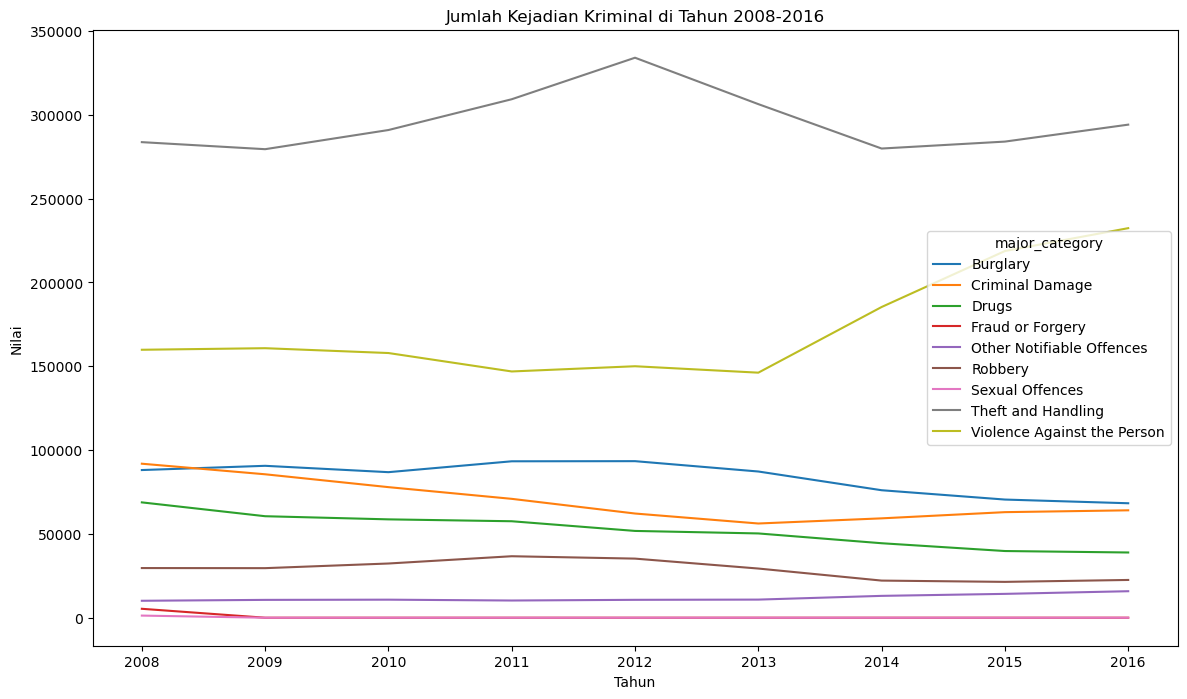

In [82]:
#Membuat visualisasi grafik
import matplotlib.pyplot as plt

df_london_tp.plot(kind='line', figsize=(14,8))
plt.title('Jumlah Kejadian Kriminal di Tahun 2008-2016')
plt.ylabel('Nilai')
plt.xlabel('Tahun')

plt.show()

#### Analisisnya :
Dari grafik diatas menunjukkan kriminal yang sedikit atau jarang terjadi adalah Sexual Offences sedangkan kriminal yang paling banyak terjadi ditahun 2008-2016 adalah Theft and Handling

#### Question : Berapa jumlah kejadian kriminal dari tahun 2008-2016 dalam bentuk plot area?

#### AREA PLOT

Text(0.5, 0, 'Tahun')

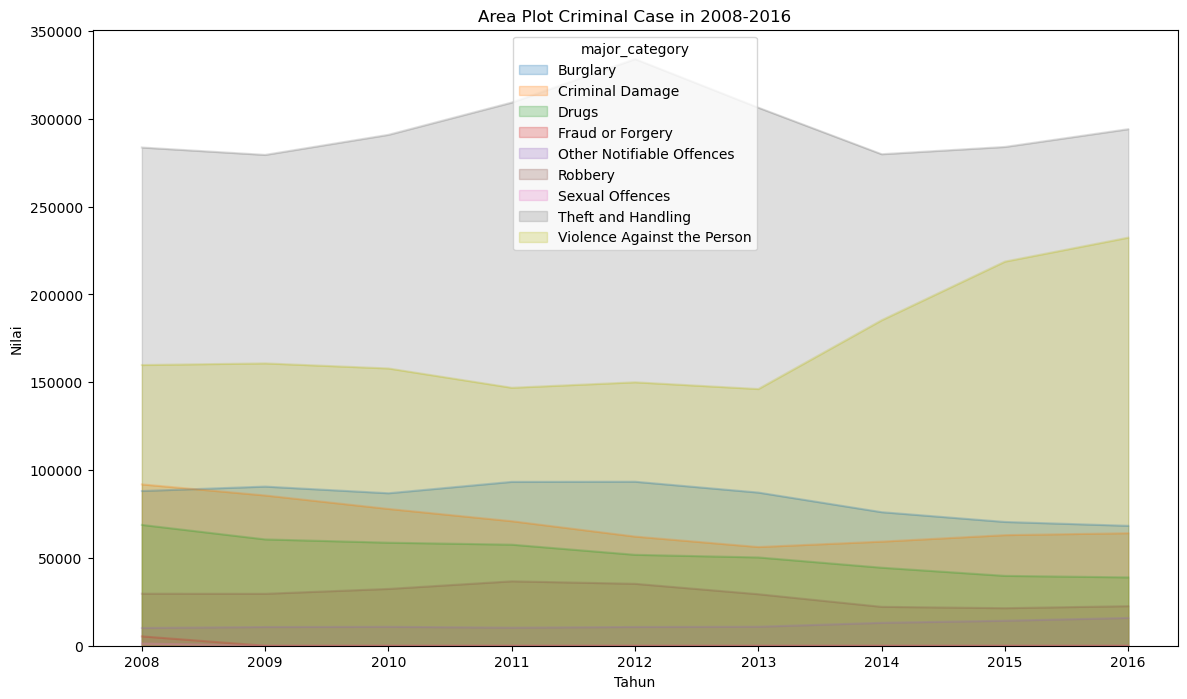

In [84]:
ax = df_london_tp.plot(kind='area',alpha=0.25, figsize=[14,8],stacked=False)
ax.set_title('Area Plot Criminal Case in 2008-2016')
plt.ylabel('Nilai')
plt.xlabel('Tahun')

#### Analisisnya :
Dari grafik diatas menunjukkan kriminal yang sedikit atau jarang terjadi adalah Sexual Offences sedangkan 
kriminal yang paling banyak terjadi ditahun 2008-2016 adalah Theft and Handling.


#### HISTOGRAM

In [13]:
df_london_3 = df_london_tp.iloc[:, 0:3]
df_london_3

major_category,Burglary,Criminal Damage,Drugs
year,,,
2008,88092,91872,68804
2009,90619,85565,60549
2010,86826,77897,58674
2011,93315,70914,57550
2012,93392,62158,51776
2013,87222,56206,50278
2014,76053,59279,44435
2015,70489,62976,39785
2016,68285,64071,38914


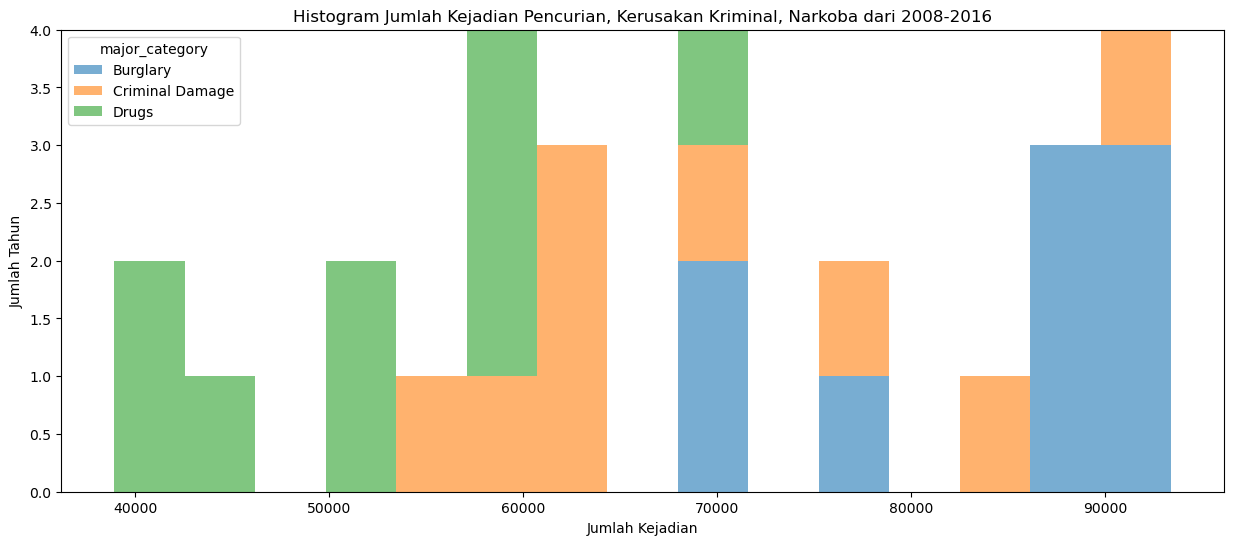

In [85]:
df_london_3.plot(kind='hist',
                 figsize=(15,6),
                 bins = 15, 
                 alpha = 0.6, 
                 stacked=True
                )
plt.title('Histogram Jumlah Kejadian Pencurian, Kerusakan Kriminal, Narkoba dari 2008-2016')
plt.ylabel('Jumlah Tahun')
plt.xlabel('Jumlah Kejadian')

plt.show()

#### Analisisnya :
Dari grafik tersebut,Burglary adalah tindakan kriminal yang paling banyak terjadi dibanding criminal damage dan drugs.


### BAR CHART

In [15]:
# Langkah 1 : Mendapatkan Data
df_robbery = df_london_pivot.loc['Robbery']
df_robbery.head()

year
2008    29627
2009    29568
2010    32341
2011    36679
2012    35260
Name: Robbery, dtype: int64

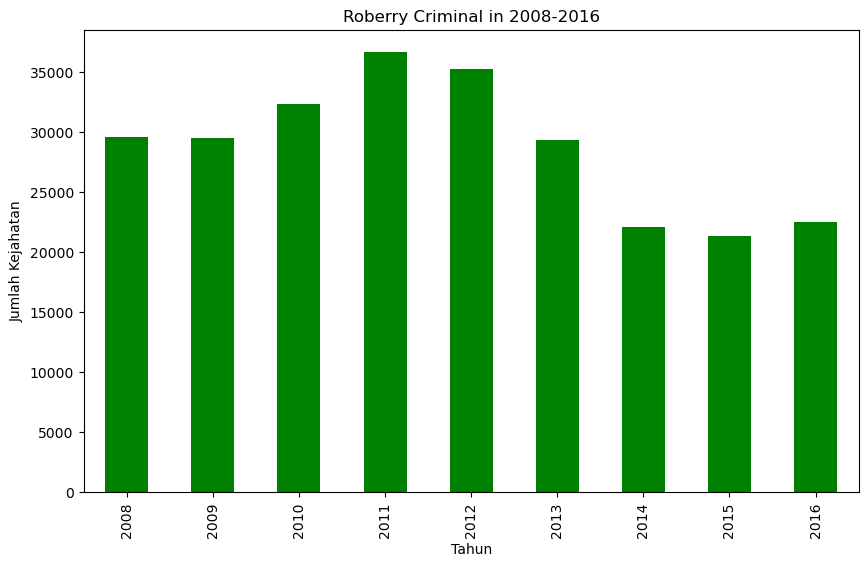

In [83]:
# Langkah 2 : Membuat Plot Data
df_robbery.plot(kind='bar', figsize=(10,6), color= 'green')

plt.xlabel('Tahun') # Menambah x label ke plot
plt.ylabel('Jumlah Kejahatan')
plt.title('Roberry Criminal in 2008-2016')

plt.show()

#### Analisisnya :
Dari grafik tersebut menunjukkan bahwa Robbery Criminal paling banyak dan sering terjadi pada tahun 2011 dan 2012.

### Question : Berapa persen jumlah pada setiap tindakan kriminal dari tahun 2008-2016?

#### PIE CHART

In [17]:
df_london_total = df_lcbl.groupby('major_category').sum()
df_london_total

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12868\2732912668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_london_total = df_london.groupby('major_category').sum()


,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


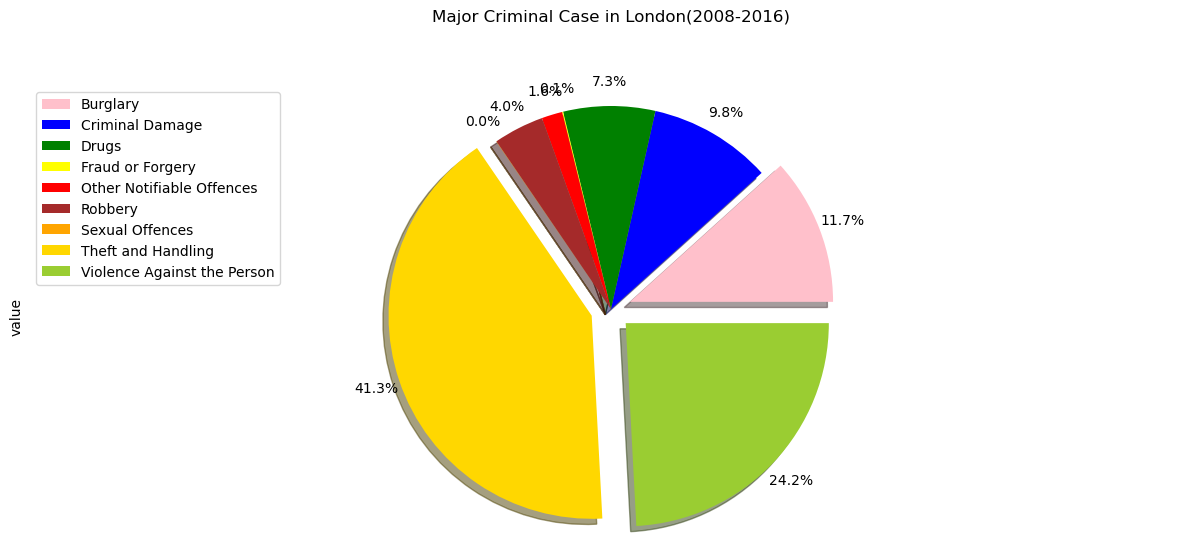

In [79]:
color_list = ['pink', 'blue', 'green', 'yellow', 'red', 'brown', 'orange', 'gold', 'yellowgreen']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]
df_london_total['value'].plot(kind='pie',
                             figsize=(15,6),
                             autopct = '%1.1f%%',
                             startangle=0,
                             shadow=True,
                             labels=None,
                             pctdistance=1.12,
                             colors=color_list,
                             explode = explode_list,
                             )
#
plt.title('Major Criminal Case in London(2008-2016)', y=1.12)

plt.axis('equal')

##
plt.legend(labels = df_london_total.index, loc='upper left')

plt.show()

#### Analisisnya : 
Dari diagram tersebut menunjukkan bahwa tingkat kejahatan yang paling banyak dan sering terjadi 
adalah Theft and Handling yaitu sebesar 41.3% sedangkan tingkat kejahatan paling jarang terjadi 
adalah sexual offence.
    

### BOX PLOT

In [19]:
df_CDB = df_london_tp.iloc[:5,:2]
df_CDB

major_category,Burglary,Criminal Damage
year,,
2008,88092,91872
2009,90619,85565
2010,86826,77897
2011,93315,70914
2012,93392,62158


In [20]:
#Menampilkan hasil statistik
df_CDB.describe()

major_category,Burglary,Criminal Damage
count,5.000000,5.000000
mean,90448.800000,77681.200000
std,2982.686826,11729.710256
min,86826.000000,62158.000000
25%,88092.000000,70914.000000
50%,90619.000000,77897.000000
75%,93315.000000,85565.000000
max,93392.000000,91872.000000


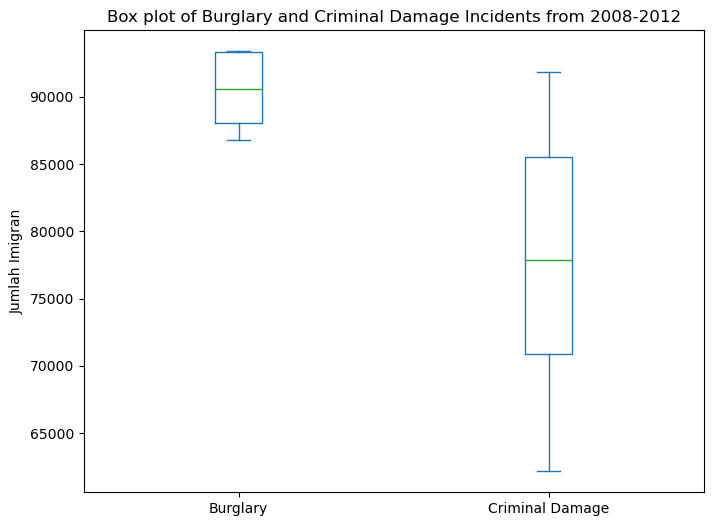

In [53]:
df_CDB.plot(kind='box', figsize=(8,6))
plt.title('Box plot of Burglary and Criminal Damage Incidents from 2008-2012')
plt.ylabel('Jumlah Imigran')

plt.show()

#### Analisisnya :
Dari grafik tersebut menunjukkan bahwa diantara dua tindakan kriminal,Burglary memiliki nilai rata-rata paling tinggi yaitu diatas 90 ribu serta di rentang waktu 2008-2012 ada tahun criminal damage incidents terjadi dibawah 65 ribu.
    

#### Question : Relasi antara total kejahatan dengan tahunnya

### SCATTER PLOT


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12868\2359462112.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_year=df_london.groupby(['year']).sum()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12868\2359462112.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(name_of_year,Values,s=100,color='red',cmap="viridis",alpha=1)


Text(0, 0.5, 'Jumlah Angka Kejahatan')

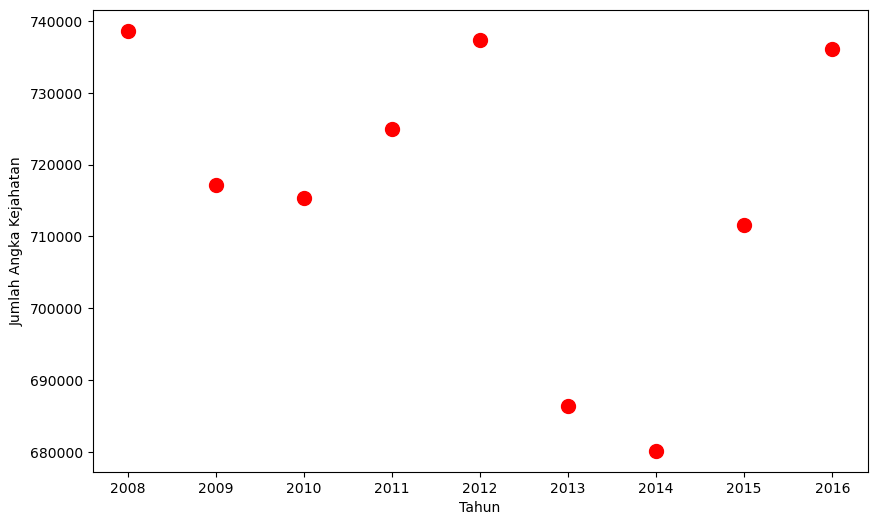

In [45]:
#Menampilkan titik koordinat
years = df_london['year'].unique()

years.sort()

sum_year=df_london.groupby(['year']).sum()

Values=sum_year['value'].to_numpy()
name_of_year=["2008", "2009", "2010","2011", "2012","2013", "2014", "2015", "2016"]

plt.figure(figsize=(10,6))
ax = plt.axes()
plt.scatter(name_of_year,Values,s=100,color='red',cmap="viridis",alpha=1)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Angka Kejahatan')

#### Analisisnya :
Berdasarkan gambar diatas menunjukkan bahwa jumlah kejahatan paling tinggi dan banyak terjadi 
yaitu pada tahun 2008 sedangkan kejahatan paling sedikit terjadi ditahun 2014.

    

#### WORDS CLOUD

In [23]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df_london_2000 = df.iloc[:2000]

In [80]:
df_london_2000['minor_category'].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

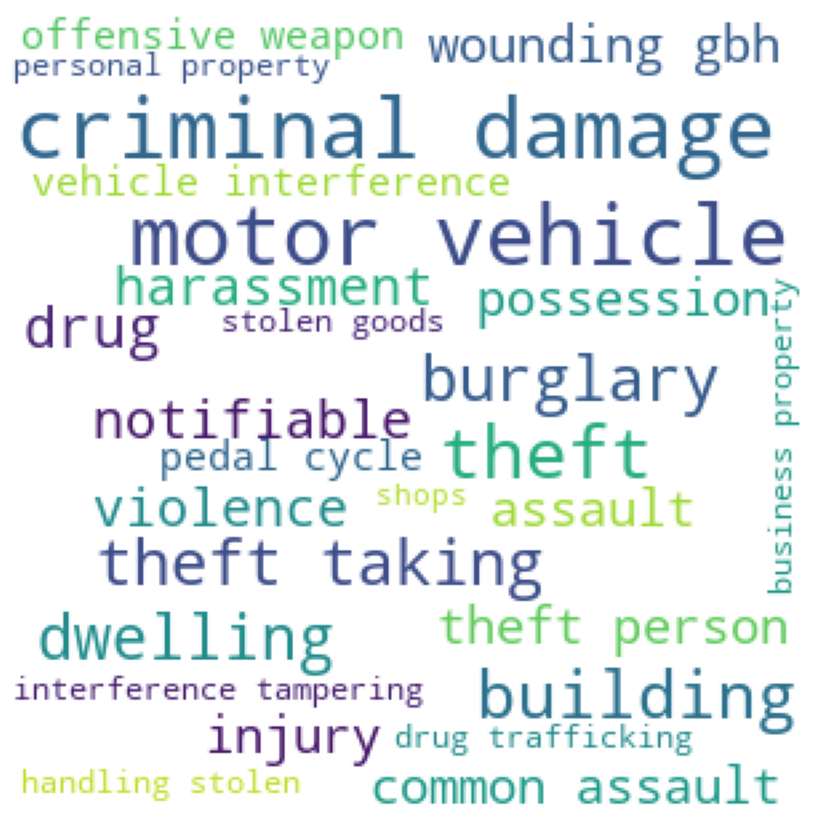

In [86]:
#Mengimpor kelas wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''

#Mengiterasi setiap nilai dari dataframe
for val in df_london_2000.minor_category :
    #Mengubah nilai menjadi string
    val = str(val)
    
    #Memisahkan setiap kata menjadi token
    tokens = val.split()
    
    #Mengiterasi setiap token
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
        
    comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 300,height  = 300,
                      background_color ='white',
                      min_font_size = 10).generate(comment_words)   
#Membuat gambar plot
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

#### Analisisnya :
Jadi dari gambar diatas menunjukkan bahwa kata 'criminal damage' adalah kata yang sering kali muncul.

### FOLIUM

In [70]:
df_london

,lsoa_code,borough,minor_category,value,year,month
major_category,,,,,,
Burglary,E01001116,Croydon,Burglary in Other Buildings,0,2016,11
Violence Against the Person,E01001646,Greenwich,Other violence,0,2016,11
Violence Against the Person,E01000677,Bromley,Other violence,0,2015,5
Burglary,E01003774,Redbridge,Burglary in Other Buildings,0,2016,3
Robbery,E01004563,Wandsworth,Personal Property,0,2008,6
...,...,...,...,...,...,...
Criminal Damage,E01000504,Brent,Criminal Damage To Dwelling,0,2015,2
Robbery,E01002504,Hillingdon,Personal Property,1,2015,6
Burglary,E01004165,Sutton,Burglary in a Dwelling,0,2011,2


In [61]:
import json
from urllib.request import urlopen

url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json"

response = urlopen(url)
data = json.loads(response.read())

print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [74]:
world_geo = data

#Membuat plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, title='OpenStreetMap')

world_map.choropleth(
     geo_data = world_geo,
     data = df_london,
     columns = ['borough', 'value'],
     key_on = 'feature.properties.name',
     fill_color='YlOrRd',
     fill_opacity = 0.7,
     line_opacity = 0.2,
     legend_name ='Criminal Incidents in London'
)
 
world_map



C:\Users\Lenovo\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### Analisisnya : 
    Dari gambar diatas disimpulkan bahwa ada satu wilayah yang tingkat kejahatannya dalam rentang 4.2-5.0
    dan sebagian besar wilayah memiliki tingkat kejahatan 0.8 apabila dilihat dari atas.